# Introduction
Voter Analysis exploration

## Imports
Import libraries and write settings here.

In [519]:
from fastai.tabular import *
from fastai import *

# Data manipulation
import pandas as pd
import numpy as np

# Options for pandas
pd.options.display.max_columns = 60
pd.options.display.max_rows = 60

# Display all cell outputs
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

from IPython import get_ipython
ipython = get_ipython()

# autoreload extension
if 'autoreload' not in ipython.extension_manager.loaded:
    %load_ext autoreload

%autoreload 2

# Visualizations
import plotly.plotly as py
import plotly.graph_objs as go
from plotly.offline import iplot, init_notebook_mode
init_notebook_mode(connected=True)

import cufflinks as cf
cf.go_offline(connected=True)
cf.set_config_file(theme='white')

import seaborn as sns


# Data Import and Cleaning

In [520]:
# first column in each file is the dependent variable, the rest are independant
csv_files=['vote12gop','TrumpGEVote','TrumpPVote']

whichfle=2
fn=csv_files[whichfle]
fle = csv_files[whichfle]+'.csv'

In [521]:
fle
fn

'TrumpPVote.csv'

'TrumpPVote'

In [522]:
#find the data
path = './data/'
#original dataset
df = pd.read_csv(path+fle,encoding = "ISO-8859-1")

In [523]:
#get rid of spaces and caps in column names (if any)
df.columns = [col.replace(' ','_').lower() for col in df.columns]

In [524]:
# df.head()
# df.columns
# df.describe()

#any duplicate rows?
df.duplicated().sum()

5

In [525]:
df.head()
len(df)

,cc.trumppvote,cc.age,cc.blackdum,cc.cc16_304,cc.cc16_305_2,cc.cc16_422c,cc.cc16_422d,cc.cc16_422e,cc.cc16_422f,cc.catholic,cc.evanprot,cc.ideo7,cc.inddum,cc.religiosity,cc.repdum,cc.sex,cc.whitedum,cc.emp.nojob,cc.faminc,cc.i.white.educhs,cc.immviewsum,cc.maxeduc.4yr,cc.union,crashpc,demo.popdense,job.uer,mort.ucd.despair.disc95.pdpy,rustpc
0,1,1.536849,0,1.263963,0,1.551223,1.647751,1.636039,0.386066,0,1,1.353232,0,1.538600,1,0,1,0,1.264915,0,1.701138,0,1,1.206765,0.010774,0.862268,0.708396,0.712639
1,0,0.906347,1,0.947973,0,0.517074,0.329550,1.227029,0.386066,0,0,0.225539,0,0.995565,0,0,0,0,1.264915,0,0.000000,1,1,1.206765,0.010774,0.862268,0.708396,0.712639
2,0,1.497443,0,1.263963,0,1.034148,1.318201,0.409010,0.386066,0,0,0.902155,1,0.905059,0,1,1,0,1.264915,0,1.701138,0,0,0.545380,0.013913,0.873229,0.923322,0.591826
3,1,1.339817,0,1.579954,0,1.551223,1.647751,1.227029,0.772133,0,1,1.353232,0,1.267082,1,1,1,0,0.983823,0,1.701138,0,0,0.545380,0.013913,0.873229,0.923322,0.591826
4,0,1.142785,0,0.315991,0,0.517074,0.329550,0.409010,0.386066,1,0,0.902155,0,0.905059,0,0,1,0,1.827100,0,0.850569,1,0,0.545380,0.013913,0.873229,0.923322,0.591826


27463

In [526]:
#lets see how many columns, how many have no and some missing values
print (f"Total columns={len(df.columns)}")
print(f"Total columns with no Nans= {len(df.columns[~df.isnull().any()])}") 
print(f"Total columns with Nans= {len(df.columns[df.isnull().any()])}") #add ~ to get columns with no missing values

#old values
# Total columns=866
# Total columns with no Nans= 268
# Total columns with Nans= 598


Total columns=28
Total columns with no Nans= 28
Total columns with Nans= 0


The columns with no NaNs (missing values) are the easiest to use since we dont have to impute missing values

## Get a subset of the rows of the data to work on if desired

In [527]:
#get first thousand rows
# df=df[:1000]

## Get the columns of interest

In [528]:
#get all the columns in df, the first is independant var, the rest are dependant
columns = list(df.columns.values)

#get the dependant variable(s)
# columns_dep_var= ['cc.TrumpGEVote','cc.TrumpPVote', 'cc.vote12.gop']
columns_dep_var= columns[0]

#combine
# columns.extend(columns_dep_var)

#strip rubbish
columns = [col.replace(' ','_').lower() for col in columns]

In [529]:
columns_dep_var

'cc.trumppvote'

## Create dataframe for model training

In [530]:
#select out the columns of interest
df_s=df[columns]

In [531]:
len(df_s.iloc[0])

28

### Output some info

In [532]:
# how many unique values there are per column, 
# use that to guide which columns are categorical and which are continuous
#pick largest value that looks continuous, for instance raceviewsum=17 
#(but see the docs many of theses fields are floats which meand fastai ignores cardinality)
for col in df_s.columns:
    print(f"{col}:{df[col].nunique()}")

cc.trumppvote:2
cc.age:77
cc.blackdum:2
cc.cc16_304:5
cc.cc16_305_2:2
cc.cc16_422c:5
cc.cc16_422d:5
cc.cc16_422e:5
cc.cc16_422f:5
cc.catholic:2
cc.evanprot:2
cc.ideo7:7
cc.inddum:2
cc.religiosity:15
cc.repdum:2
cc.sex:2
cc.whitedum:2
cc.emp.nojob:2
cc.faminc:16
cc.i.white.educhs:2
cc.immviewsum:5
cc.maxeduc.4yr:2
cc.union:2
crashpc:2192
demo.popdense:2192
job.uer:695
mort.ucd.despair.disc95.pdpy:2192
rustpc:2037


In [533]:
#what types are the columns
df_s.dtypes

cc.trumppvote                     int64
cc.age                          float64
cc.blackdum                       int64
cc.cc16_304                     float64
cc.cc16_305_2                     int64
cc.cc16_422c                    float64
cc.cc16_422d                    float64
cc.cc16_422e                    float64
cc.cc16_422f                    float64
cc.catholic                       int64
cc.evanprot                       int64
cc.ideo7                        float64
cc.inddum                         int64
cc.religiosity                  float64
cc.repdum                         int64
cc.sex                            int64
cc.whitedum                       int64
cc.emp.nojob                      int64
cc.faminc                       float64
cc.i.white.educhs                 int64
cc.immviewsum                   float64
cc.maxeduc.4yr                    int64
cc.union                          int64
crashpc                         float64
demo.popdense                   float64


In [534]:
#the percentage of NaNs in each column, note the large percentage of missing values in the bottom columns
#I would guess that cc.faminc and cc.raceviewsum are critical
df_s.isna().sum().sort_values(ascending = True)/len(df)

cc.trumppvote                   0.0
job.uer                         0.0
demo.popdense                   0.0
crashpc                         0.0
cc.union                        0.0
cc.maxeduc.4yr                  0.0
cc.immviewsum                   0.0
cc.i.white.educhs               0.0
cc.faminc                       0.0
cc.emp.nojob                    0.0
cc.whitedum                     0.0
cc.sex                          0.0
cc.repdum                       0.0
cc.religiosity                  0.0
cc.inddum                       0.0
cc.ideo7                        0.0
cc.evanprot                     0.0
cc.catholic                     0.0
cc.cc16_422f                    0.0
cc.cc16_422e                    0.0
cc.cc16_422d                    0.0
cc.cc16_422c                    0.0
cc.cc16_305_2                   0.0
cc.cc16_304                     0.0
cc.blackdum                     0.0
cc.age                          0.0
mort.ucd.despair.disc95.pdpy    0.0
rustpc                      

In [535]:
#BUMMER! the dependant variable has a lot of missing values (36.7%)
df_s[columns_dep_var].unique()

array([1, 0])

## Remove NaN dependent variable rows
whaddaya going to do?  You have no way of knowing how these people voted

In [536]:
print(f"There are {len(df_s)} rows in df_s")

There are 27463 rows in df_s


In [537]:
#dump the NaN rows
df_s = df_s[pd.notnull(df_s[columns_dep_var] )]

In [538]:
#convert trumpgevote to long (otherwise fit fails)
df_s[columns_dep_var] = df_s[columns_dep_var].astype('int64');

In [539]:
#causes nan for learner
# df_s['cc.trumpgevote'] = df_s['cc.trumpgevote'].astype('category');
# df_s['cc.trumpgevote'].cat.categories

In [540]:
#is the dataset balanced?
df_vc= df_s[columns_dep_var].value_counts()
df_vc[0]
df_vc[1]

21691

5772

In [541]:
#how about as percentages
print(f"total percentage of people who voted for trump in this datasets={100*df_vc[0]/(df_vc[0]+df_vc[1])}")

total percentage of people who voted for trump in this datasets=78.982631176492


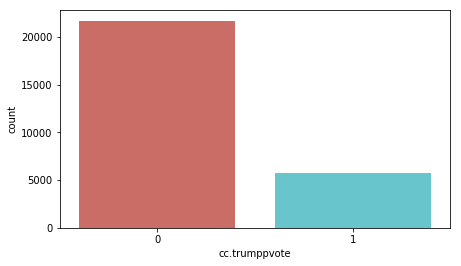

In [542]:
#lets see that as a graph
fig, ax = plt.subplots(figsize=(7, 4))
sns.countplot(x=columns_dep_var, data=df_s, palette='hls')

## Split out categorical and continuous variables
see if fastai can auto do it

In [543]:
#give fastai a shot at splitting cat and cont variables
res_cont, res_cat = cont_cat_split(df_s,max_card=18)

In [544]:
# ??cont_cat_split

In [545]:
print(res_cont)
print(res_cat)

['cc.age', 'cc.cc16_304', 'cc.cc16_422c', 'cc.cc16_422d', 'cc.cc16_422e', 'cc.cc16_422f', 'cc.ideo7', 'cc.religiosity', 'cc.faminc', 'cc.immviewsum', 'crashpc', 'demo.popdense', 'job.uer', 'mort.ucd.despair.disc95.pdpy', 'rustpc']
['cc.trumppvote', 'cc.blackdum', 'cc.cc16_305_2', 'cc.catholic', 'cc.evanprot', 'cc.inddum', 'cc.repdum', 'cc.sex', 'cc.whitedum', 'cc.emp.nojob', 'cc.i.white.educhs', 'cc.maxeduc.4yr', 'cc.union']


In [546]:
columns_dep_var

'cc.trumppvote'

In [547]:
#remove the dependant variable
res_cont = [x for x in res_cont if x not in columns_dep_var]
res_cat = [x for x in res_cat if x not in columns_dep_var]

In [548]:
df_s.head()
len(df_s)

,cc.trumppvote,cc.age,cc.blackdum,cc.cc16_304,cc.cc16_305_2,cc.cc16_422c,cc.cc16_422d,cc.cc16_422e,cc.cc16_422f,cc.catholic,cc.evanprot,cc.ideo7,cc.inddum,cc.religiosity,cc.repdum,cc.sex,cc.whitedum,cc.emp.nojob,cc.faminc,cc.i.white.educhs,cc.immviewsum,cc.maxeduc.4yr,cc.union,crashpc,demo.popdense,job.uer,mort.ucd.despair.disc95.pdpy,rustpc
0,1,1.536849,0,1.263963,0,1.551223,1.647751,1.636039,0.386066,0,1,1.353232,0,1.538600,1,0,1,0,1.264915,0,1.701138,0,1,1.206765,0.010774,0.862268,0.708396,0.712639
1,0,0.906347,1,0.947973,0,0.517074,0.329550,1.227029,0.386066,0,0,0.225539,0,0.995565,0,0,0,0,1.264915,0,0.000000,1,1,1.206765,0.010774,0.862268,0.708396,0.712639
2,0,1.497443,0,1.263963,0,1.034148,1.318201,0.409010,0.386066,0,0,0.902155,1,0.905059,0,1,1,0,1.264915,0,1.701138,0,0,0.545380,0.013913,0.873229,0.923322,0.591826
3,1,1.339817,0,1.579954,0,1.551223,1.647751,1.227029,0.772133,0,1,1.353232,0,1.267082,1,1,1,0,0.983823,0,1.701138,0,0,0.545380,0.013913,0.873229,0.923322,0.591826
4,0,1.142785,0,0.315991,0,0.517074,0.329550,0.409010,0.386066,1,0,0.902155,0,0.905059,0,0,1,0,1.827100,0,0.850569,1,0,0.545380,0.013913,0.873229,0.923322,0.591826


27463

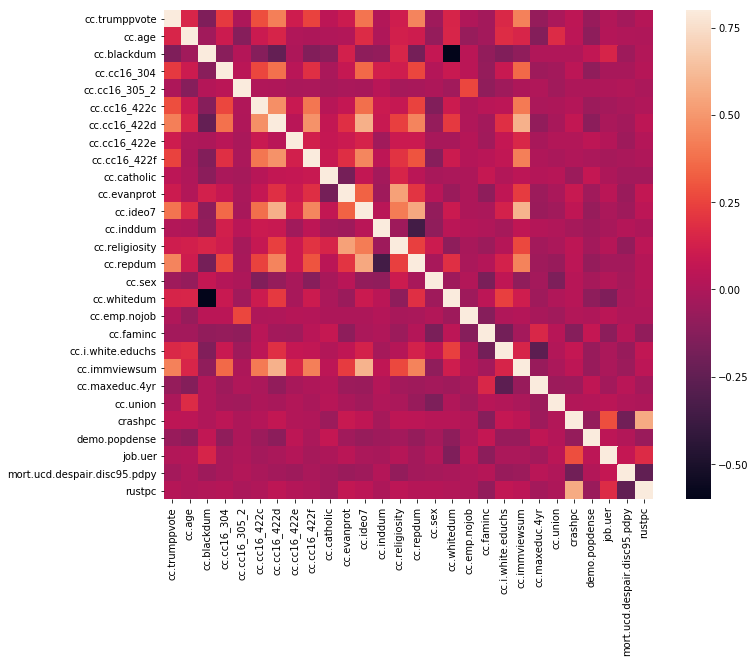

In [549]:
#correlation matrix
corrmat = df_s.corr(method='pearson')
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);

#there is a lot of correlation here,the darks and the lights

## Split out train/test sets for consistency
Neural Nets, Random Forest, etc will use same sets, so result differnces cannot be attributed to different splits

In [550]:
# split out train/test sets
from sklearn.model_selection import train_test_split

train,tst = train_test_split(df_s, test_size=0.1)
print(str(len(train)))
print(str(len(tst)))

24716
2747


# Save train/test and catagorical and continuous column names

In [551]:
os.makedirs('tmp', exist_ok=True)

train.reset_index(inplace=True)
train.to_feather('tmp/' + fn +'_train')

tst.reset_index(inplace=True)
tst.to_feather('tmp/' + fn +'_tst')

In [552]:
tst.head()

,index,cc.trumppvote,cc.age,cc.blackdum,cc.cc16_304,cc.cc16_305_2,cc.cc16_422c,cc.cc16_422d,cc.cc16_422e,cc.cc16_422f,cc.catholic,cc.evanprot,cc.ideo7,cc.inddum,cc.religiosity,cc.repdum,cc.sex,cc.whitedum,cc.emp.nojob,cc.faminc,cc.i.white.educhs,cc.immviewsum,cc.maxeduc.4yr,cc.union,crashpc,demo.popdense,job.uer,mort.ucd.despair.disc95.pdpy,rustpc
0,18352,0,0.709315,0,0.631982,0,1.551223,0.329550,1.636039,0.386066,0,0,0.451077,0,0.362024,0,1,1,0,0.562184,1,0.000000,0,0,0.981322,0.015040,1.238597,0.918803,0.458212
1,21304,0,0.788128,0,0.947973,0,0.517074,0.659101,1.227029,0.772133,0,0,0.902155,1,0.452529,0,1,1,0,1.264915,0,0.000000,1,0,0.696811,0.064986,0.706987,0.600396,1.260658
2,17224,0,1.103379,0,0.947973,0,0.517074,0.659101,0.409010,0.386066,1,0,0.225539,0,0.814553,0,1,1,0,0.702731,0,0.000000,1,1,0.357314,0.191659,0.738043,0.859472,0.462104
3,27346,0,1.320114,0,0.947973,0,0.517074,0.329550,1.636039,0.772133,0,0,0.676616,0,0.271518,0,1,1,0,0.421638,1,0.425285,0,1,0.471241,0.083311,0.538917,0.797814,0.757643
4,4984,0,1.438333,0,0.631982,0,0.517074,0.329550,0.818020,0.772133,0,0,0.902155,0,0.362024,0,0,1,0,0.843277,0,0.000000,0,1,0.402034,0.174046,1.165523,0.943574,0.296608


In [553]:
import simplejson
with open('tmp/' + fn + '_catcont.json','w') as f:
    json.dump((res_cont,res_cat,columns_dep_var), f)
    

# Results
Show graphs and stats here